# Part II - (San Francisco Ford GoBike Data Exploration)
## by (Saddick Kwao Umar)

## Investigation Overview

> In this investigation, my focus or objective has been to determine how both dependent and independent features like age, user_type, gender, time, days and ofcourse day periods influenced trips duration and amount of trips taken.

## Dataset Overview

> The dataset contains 183,412 records of trips, and 16 different features including start time, end time, start station, end station, and latitude/longitude for each station.The dataset contains few numeric variables and categorical variables.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
fordbikes = df.copy()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
fordbikes.isnull().sum()
fordbikes.dropna(inplace = True)

In [4]:
# let's convert variables to the right datatypes
fordbikes['member_birth_year'] = fordbikes['member_birth_year'].astype(np.int64)
fordbikes['bike_id'] = fordbikes['bike_id'].astype(str)

# convert these variables into categorical variables using a loop
cat_dtypes = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for i in cat_dtypes:
    fordbikes[i] = fordbikes[i].astype("category")

# convert these variables into datetime variables using a loop
dates = ['start_time', 'end_time']
for i in dates:
    fordbikes[i] = pd.to_datetime(fordbikes[i])
    

# creating columns
fordbikes.insert(2, 'hour', fordbikes['start_time'].dt.hour)
fordbikes.insert(3, "day", fordbikes['start_time'].dt.day_name())
fordbikes.insert(16, "age", 2019 - fordbikes['member_birth_year'])

# drop columns
columns = ['start_station_id', 'end_station_id', 'member_birth_year']
fordbikes.drop(columns = columns, inplace = True )

In [5]:
# removing both high and low outliers

low_outliers = (fordbikes['duration_sec'] < 1500) & (fordbikes['age'] > 80)
print(low_outliers.sum())
fordbikes.loc[low_outliers, :].head()

high_outliers = (fordbikes['duration_sec'] > 6000) | (fordbikes['age'] > 80)
print(high_outliers.sum())
fordbikes.loc[high_outliers, :].head()

fordbikes = fordbikes.loc[-low_outliers & -high_outliers]
fordbikes.head()

187
895


,duration_sec,start_time,hour,day,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,age,member_gender,bike_share_for_all_trip
4,1585,2019-02-28 23:54:18.549,23,Thursday,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,45,Male,Yes
5,1793,2019-02-28 23:49:58.632,23,Thursday,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,60,Male,No
6,1147,2019-02-28 23:55:35.104,23,Thursday,2019-03-01 00:14:42.588,Palm St at Willow St,37.317298,-121.884995,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,36,Female,No
7,1615,2019-02-28 23:41:06.766,23,Thursday,2019-03-01 00:08:02.756,Washington St at Kearny St,37.795393,-122.404770,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,30,Male,No
8,1570,2019-02-28 23:41:48.790,23,Thursday,2019-03-01 00:07:59.715,Washington St at Kearny St,37.795393,-122.404770,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,31,Other,No


## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

## Distribution of Trips Taken
> Trip duration distribution was far left due to it being highly skewed to the right, showing how it's mean is affected by outliers. After undergong log transformation, it could be observed that its distribution looks unimodal and that most trips lasted in between 300 to 600.

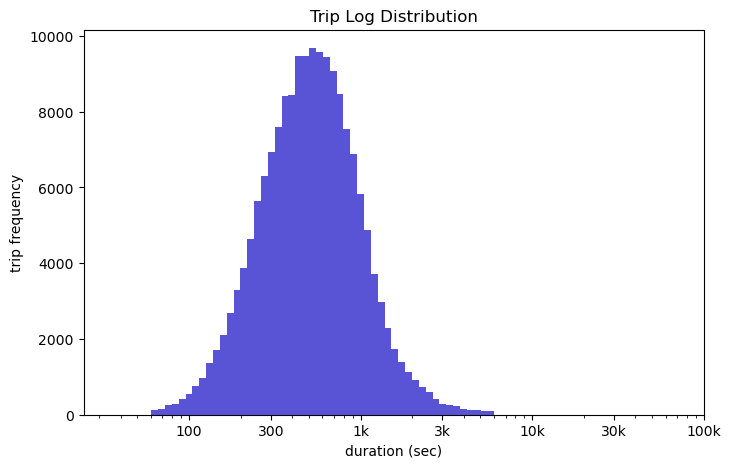

In [6]:
# investigate further with smaller bins size
bins = 10 ** np.arange(1.5, np.log10(fordbikes['duration_sec'].max())+0.040, 0.040)

colors = '#5954d6'

plt.figure(figsize = [8, 5])
plt.hist(data = fordbikes, x = 'duration_sec', bins = bins, color = colors)
plt.xlabel('duration (sec)')
plt.ylabel('trip frequency')
plt.xscale('log')
plt.xticks([100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [100, 300, '1k', '3k', '10k', '30k', '100k'])
plt.title('Trip Log Distribution');

## Age Distribution of Go Bike Users
> The visualization here shows the age distribution of Go Bike users, where large chunks of riders fall within age brackets of 30 to 40 years in both gender. Nonetheless, it could be seen that the amount of male riders in each age bracket is far exceeds other gender.

In [7]:
# let's leverage pd.cut to create a new column for age ranges
bins = [15, 20, 25, 30, 40, 50, 60, 70, 80]
labels = ['Below 20 Years','18-25 Years', '25-30 Years', '30-40 Years', '40-50 Years', '50-60 Years', '60-70 Years', '70-80 Years']
fordbikes['age_ranges'] = pd.cut(fordbikes['age'], bins = bins, labels = labels)

# now let's filter both male and female gender seperately
mask1 = fordbikes['member_gender'] == 'Male'
mask2 = fordbikes['member_gender'] == 'Female'

males = fordbikes.loc[mask1]
females = fordbikes.loc[mask2]


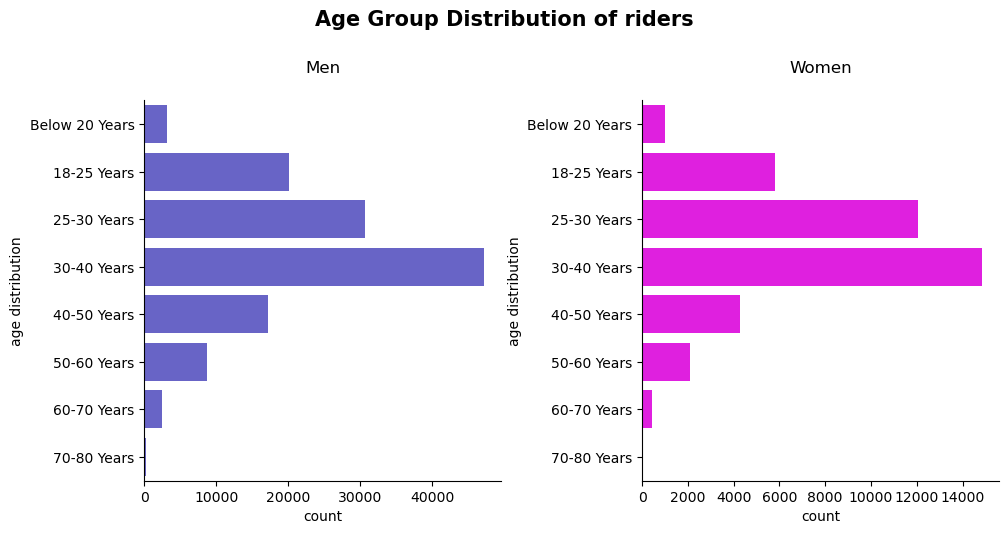

In [8]:
# plotting visualization
fig, ax = plt.subplots(ncols = 2, figsize = [10, 5])
fig.suptitle('Age Group Distribution of riders', y = 1.04, fontsize = 15, fontweight = 'bold')

sb.countplot(data = males, y = 'age_ranges', color = colors, ax = ax[0])
ax[0].set_title('Men', pad = 20)
ax[0].set_ylabel('age buckets')
ax[0].set_ylabel('age distribution')
sb.countplot(data = females, y = 'age_ranges', color = 'Magenta', ax = ax[1])
ax[1].set_title('Women', pad = 20)
ax[1].set_ylabel('age buckets')
ax[1].set_ylabel('age distribution')
sb.despine()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.5);

## GoBike User Type Subscription Ratio 
> From the visualization, most Go Bike users tend to be under a subscription package with 90.7% of it users under a subscription package and 9.3% casual riders.

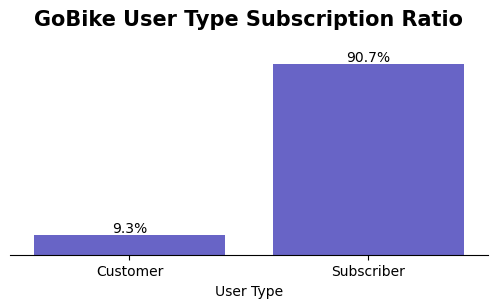

In [9]:
order = fordbikes['user_type'].value_counts(sort = False).index

fig = plt.figure(figsize = [5,3])
fig.suptitle("GoBike User Type Subscription Ratio", ha = 'center', y = 1, fontsize = 15, fontweight = 'bold')

g = sb.countplot(data = fordbikes, x = 'user_type', order = order, color = colors)
g.set(yticklabels = [])
g.set(ylabel = "")
g.set(xlabel = "User Type")
plt.tick_params(left = False)

user_counts = fordbikes['user_type'].value_counts(sort = False)
total = fordbikes['user_type'].value_counts().sum()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count =user_counts[loc]
    counts = user_counts[label.get_text()]
    percent_str = '{:0.1f}%'.format(100*count/total)
    plt.text(loc, counts+2, percent_str, ha = 'center', va = 'bottom', color = 'black')
sb.despine(left = True)
plt.tight_layout(pad=0.8, w_pad=1.8, h_pad=2.2);

## GoBike Bike Share for All Trip Subscription Ratio 
>  There's very less subscription for the "bike share for all" program. Only 9.9% of riders agreed to subscribe to Go Bike's bike for all trip program with 90.1% declining.

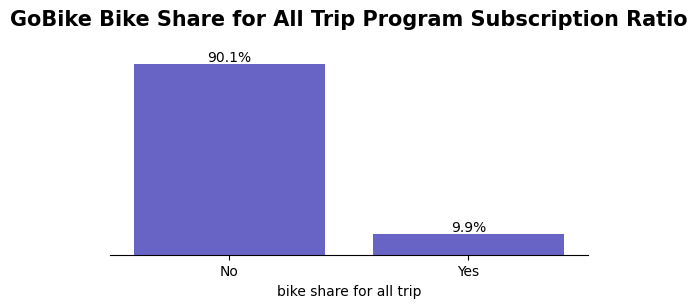

In [10]:
order = fordbikes['bike_share_for_all_trip'].value_counts().index

fig = plt.figure(figsize = [5,3])
fig.suptitle("GoBike Bike Share for All Trip Program Subscription Ratio", 
             ha = 'center', y = 1, fontsize = 15, fontweight = 'bold')

g = sb.countplot(data = fordbikes, x = 'bike_share_for_all_trip', order = order, color = colors)
g.set(yticklabels = [])
g.set(ylabel = "")
g.set(xlabel = "bike share for all trip")
plt.tick_params(left = False)

user_counts = fordbikes['bike_share_for_all_trip'].value_counts()
total = fordbikes['bike_share_for_all_trip'].value_counts().sum()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count =user_counts[loc]
    counts = user_counts[label.get_text()]
    percent_str = '{:0.1f}%'.format(100*count/total)
    plt.text(loc, counts+2, percent_str, ha = 'center', va = 'bottom', color = 'black')
sb.despine(left = True)
plt.tight_layout(pad=0.8, w_pad=1.8, h_pad=2.2);

## GoBike Gender Subscription Ratio
Moreover, cycling and bike share are often male dominated, and here is no exception. The visualization show that 74.6% riders appear to be males and 23.3% are females, other gender 2.1%

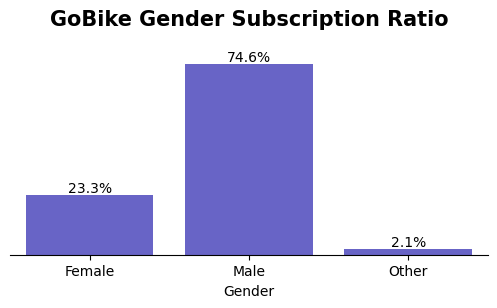

In [11]:
order = fordbikes['member_gender'].value_counts(sort = False).index

fig = plt.figure(figsize = [5,3])
fig.suptitle("GoBike Gender Subscription Ratio", ha = 'center', y = 1, fontsize = 15, fontweight = 'bold')
g = sb.countplot(data = fordbikes, x = 'member_gender', color = colors)
g.set(yticklabels = [])
g.set(ylabel = "")
g.set(xlabel = 'Gender')
plt.tick_params(left = False)

user_counts = fordbikes['member_gender'].value_counts(sort = False)
total = fordbikes['member_gender'].value_counts().sum()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count =user_counts[loc]
    counts = user_counts[label.get_text()]
    percent_str = '{:0.1f}%'.format(100*count/total)
    plt.text(loc, counts+2, percent_str, ha = 'center', va = 'bottom', color = 'black')
sb.despine(left = True)
plt.tight_layout(pad=0.8, w_pad=1.8, h_pad=2.2);

## Trip Frequency by Hour and Day 

> Unsurprisingly, most trips were made during morning and afternoon. The peak in this hours shows that GoBike is popular with office commuters and students with frequency of bike sharing peaking at 8am to 9am during office and school going time and from 5pm to 6pm during office and school closing times.
Also, Thursdays happens to be most popular with riders, whilst there isn't much biking during weekends.

In [12]:
# let's leverage on feature engineering to create an additional column 'day_periods' by using pandas.cut
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
day_periods = pd.cut(fordbikes['hour'], bins = bins, labels = labels, right = False)
fordbikes.insert(4, 'day_periods', day_periods)

In [13]:
# let's generate numbers in ascending order and use the ordering to order our created 'hour' column
order = fordbikes.hour.value_counts().index
order = order.sort_values().tolist()

In [14]:
# convert day_periods, day, and hour columns into ordered categorical types
ordinal_var_dict = {'day_periods' : ['Morning', 'Afternoon', 'Evening', 'Night'], 
                    'day' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'hour' : order}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var] )
    fordbikes[var] = fordbikes[var].astype(ordered_var)

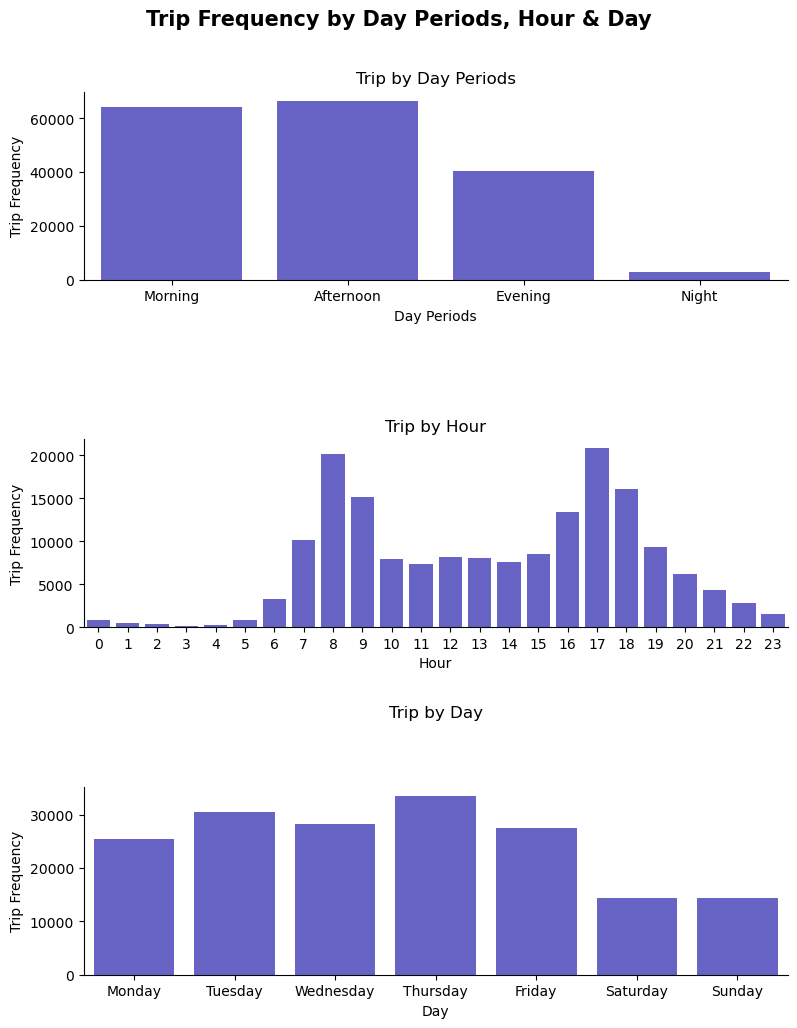

In [15]:
fig, ax = plt.subplots(nrows = 3, figsize = [8, 10], squeeze = True)
fig.suptitle('Trip Frequency by Day Periods, Hour & Day', y = 1.02, fontsize = 15, fontweight = 'bold')
time_cols = ['day_periods', 'hour', 'day']

for i in range(len(time_cols)):
    var = time_cols[i]
    sb.countplot(data = fordbikes, x = var, color = colors, ax = ax[i])
    ax[i].set_xlabel('Day Periods')
    ax[i].set_ylabel('Trip Frequency')
    ax[i].set_title('Trip by Day Periods')
    ax[1].set_xlabel('Hour')
    ax[i].set_ylabel('Trip Frequency')
    ax[1].set_title('Trip by Hour')
    ax[2].set_xlabel('Day')
    ax[i].set_ylabel('Trip Frequency')
    ax[2].set_title('Trip by Day', pad = 50)
plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=2.5);
sb.despine()

## Relationship between Bikers by Age and  Trip Frequency
> Notice the negative trend between the bikers age and the time spent biking. With peaks between 330 to 600 seconds and age ranging from 25 to 35, the heatmap depicts most trips taken to be short trips and by people within working class and college going age. Importantly, the visualization shows a less trips are taken has users age.

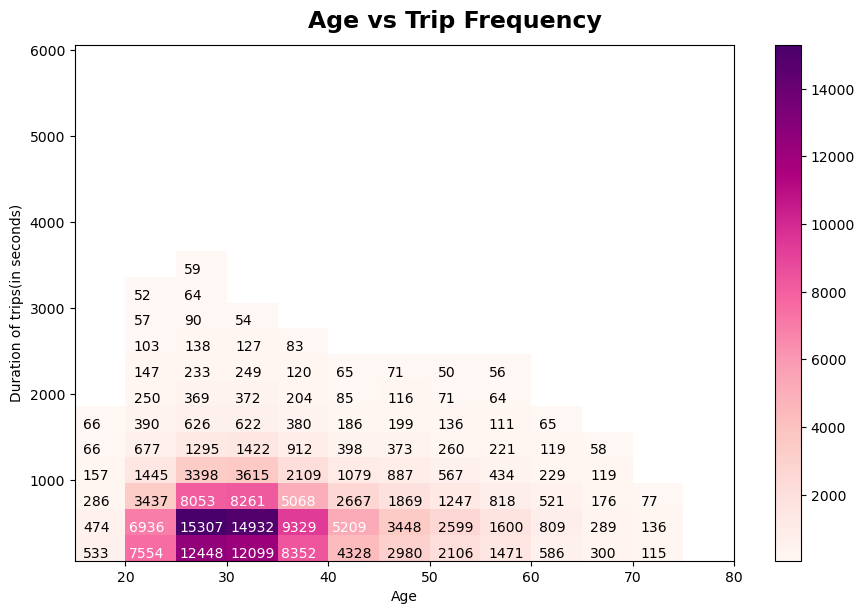

In [16]:
fig = plt.figure(figsize = [9, 6])
fig.suptitle('Age vs Trip Frequency', y = 1, fontsize = 17, fontweight = 'bold')

bins_x = np.arange(15, fordbikes['age'].max()+5, 5)
bins_y = np.arange(60, fordbikes['duration_sec'].max()+300, 300)

hd2 = plt.hist2d(data = fordbikes, x = 'age', y = 'duration_sec', 
                 cmin = 50, cmap = 'RdPu', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Duration of trips(in seconds)')



counts = hd2[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c > 5000:
            plt.text(bins_x[i]+0.35, bins_y[j]+5.5, int(c),
                    ha = 'left', va = 'bottom', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.80, bins_y[j]+5.5, int(c),
                    ha = 'left', va ='bottom', color = 'black')
plt.tight_layout(pad=0.4, w_pad=0.8, h_pad=1.0);

## GoBike User Type Trip Ratio by  Day 
> The visualization shows that casual riders tend to make 7% to 15% of the trips taken each day. This only shows they are unmotivated to subscribe to a package despite their tendencies to use bikes as means of transportation. To push unsuscribers towards subscription package, Go bikes might consider a little increase in unsuscriber fees.

In [17]:
counts = fordbikes.groupby(['day', 'user_type']).size()
counts = counts.reset_index(name = 'count')
counts = pd.pivot(data = counts, index = 'day', columns = 'user_type', values = 'count')

# creating additional columns in percentages for customer and subscriber
counts['Customer_pc'] = 100*(counts['Customer']/(counts['Customer']+counts['Subscriber']))
counts['Subscriber_pc'] = 100*(counts['Subscriber']/(counts['Customer']+counts['Subscriber']))
counts = counts.reset_index()
counts = counts.set_index(keys = 'day')

# Now let's retrieve only ratio columns from the counts dataframe
trips_ratio = counts.loc[:, ['Customer_pc', 'Subscriber_pc']]

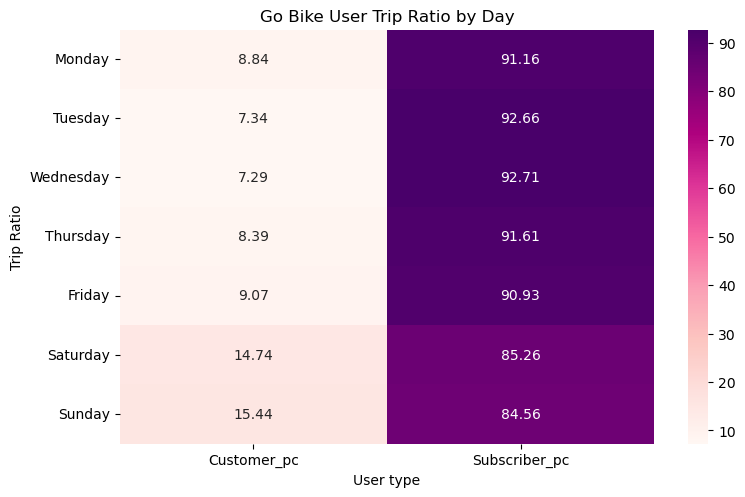

In [18]:
plt.figure(figsize = [8, 5])

sb.heatmap(data = trips_ratio, annot = True, fmt = '.2f', cmap = 'RdPu')
plt.xlabel('User type')
plt.ylabel('Trip Ratio')
plt.title('Go Bike User Trip Ratio by Day')
plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=2.2);

# GoBike Average Trip Duration Each Day by Gender
> From the visualization it can be observed that males tend to make short trips or complete trips quicker every single day. Whereas, females and other gender tend to make less but long trips hence leading to higher average duration. 

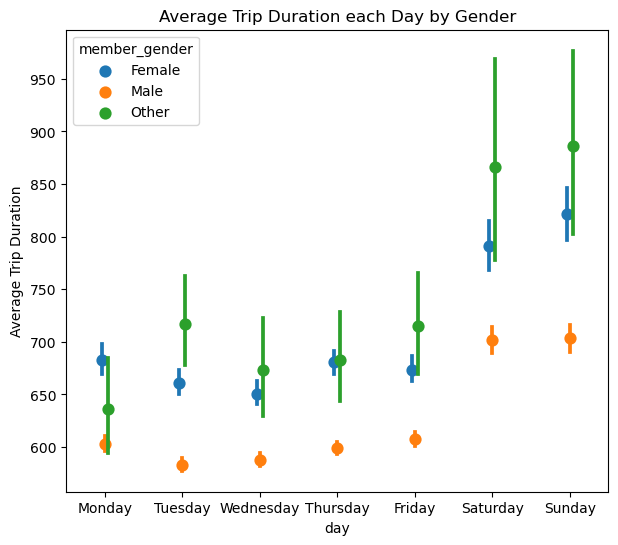

In [19]:
fig, ax = plt.subplots(figsize = [7, 6])

sb.pointplot(data = fordbikes, x = 'day', y = 'duration_sec', 
             dodge = True, hue = 'member_gender', linestyles = " ")
plt.xlabel('day')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration each Day by Gender');

In [20]:
!jupyter nbconvert Part_II_GoBike_slide_deck.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_GoBike_slide_deck.ipynb to slides
[NbConvertApp] Writing 1010191 bytes to Part_II_GoBike_slide_deck.slides.html
